# Standard Genetic Algo

In [7]:
from random import randint, uniform
import pandas as pd
pd.set_option('display.max_columns', None)
n_pop = 10
n_bits = 8
n_iter = 5
r_cross = 0.8 # crossover rate
r_mut = 0.1 # flip bits with probability

In [218]:
def objective(candidate):
    sum_ = 0
    for bit in candidate:
        sum_ += bit
    return sum_

In [219]:
def selection(pop,scores,k=3):
    # first random selection
    selection_ix = randint(0,len(pop)-1)
    for ix in [randint(0,len(pop)-1) for x in range(k-1)]:
    # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

In [220]:
# crossover two parents to create two children
def crossover(p1,p2,r_cross):
    print([p1,p2])
    # children are copies of parents by default
    c1 , c2 = p1.copy(), p2.copy()
    # check for recombination
    if uniform(0,1) < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1,c2]

In [221]:
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if uniform(0,1) < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

In [222]:
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut):
    # initial population of random bitstring
    pop = [[randint(0,1) for x in range(n_bits)] for _ in range(n_pop)]
    print(pop)
    # keep track of best solution
    best, best_eval = 0, objective(pop[0])
    # enumerate generations
    for gen in range(n_iter):
        # evaluate all candidates in the population
        scores = [objective(c) for c in pop]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen, pop[i], scores[i]))
        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    return [best, best_eval]

In [226]:
genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut)

[[1, 1, 1, 1, 1, 0, 0, 1], [1, 0, 1, 0, 1, 1, 1, 1], [0, 0, 1, 1, 1, 0, 1, 1], [0, 1, 1, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1, 1], [1, 1, 0, 0, 0, 1, 0, 1], [0, 1, 1, 1, 0, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1, 1], [0, 1, 0, 1, 1, 1, 0, 0], [0, 1, 0, 0, 1, 0, 1, 1]]
>0, new best f([0, 0, 1, 1, 1, 0, 1, 1]) = 5.000
>0, new best f([0, 0, 1, 0, 1, 0, 1, 1]) = 4.000
[[0, 1, 0, 1, 1, 1, 0, 0], [1, 1, 0, 0, 0, 1, 0, 1]]
[[0, 1, 0, 1, 1, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1, 1]]
[[0, 1, 0, 0, 1, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1, 1]]
[[0, 1, 0, 1, 1, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1, 1]]
[[0, 1, 0, 1, 1, 1, 0, 0], [0, 1, 0, 0, 1, 0, 1, 1]]
>1, new best f([0, 0, 0, 1, 1, 1, 0, 0]) = 3.000
[[0, 0, 0, 0, 1, 0, 1, 1], [0, 1, 0, 1, 1, 0, 0, 0]]
[[0, 1, 0, 1, 1, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0, 0]]
[[0, 1, 0, 1, 1, 1, 0, 0], [0, 1, 1, 0, 1, 1, 1, 1]]
[[0, 1, 0, 1, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1, 1]]
[[0, 1, 0, 0, 1, 0, 1, 1], [0, 1, 0, 1, 1, 0, 0, 0]]
>2, new best f([0, 1, 0, 0, 1, 0, 0, 0]) = 2.000
[[0, 1, 1, 1,

[[0, 0, 1, 0, 0, 0, 0, 0], 1]

# P&L Table Creation

Target: (rank((vwap - close)) / rank((vwap + close)))
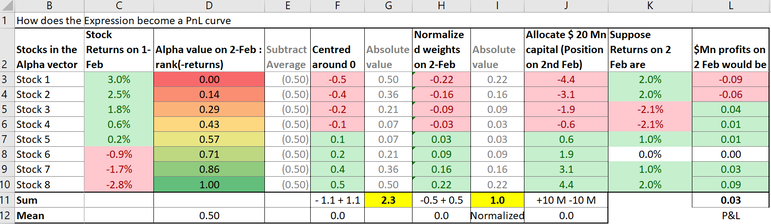

In [8]:
14/100

0.14

In [9]:
6/22

0.2727272727272727

In [31]:
import pandas as pd
from datetime import date
from IPython.display import display

In [100]:
tickers = ['PLD','AMT','PSA','SPG','DLR','EQR']
files_array = {}

for ticker in tickers:
    files_array[ticker] = pd.read_excel('yahoo_finance_reits_data.xlsx',sheet_name=ticker,index_col=0).reset_index()[-500:]

In [101]:
files_array

{'PLD':            Date        Open        High         Low       Close   Volume  \
 5987 2021-09-09  131.094692  131.475776  128.322265  128.350845  2566600   
 5988 2021-09-10  128.741486  128.941549  127.207601  127.312401  1963500   
 5989 2021-09-13  128.398495  128.569978  126.340610  126.502571  1713800   
 5990 2021-09-14  126.950358  127.350500  125.492693  126.283455  1781400   
 5991 2021-09-15  126.721680  127.950701  125.816596  126.988441  2223700   
 ...         ...         ...         ...         ...         ...      ...   
 6482 2023-08-29  123.970001  125.349998  122.760002  125.099998  1833500   
 6483 2023-08-30  125.489998  125.959999  124.699997  125.699997  1849300   
 6484 2023-08-31  125.360001  125.910004  123.889999  124.199997  3277600   
 6485 2023-09-01  125.400002  125.570000  124.050003  124.589996  1591000   
 6486 2023-09-05  124.250000  124.500000  121.860001  122.050003  2854100   
 
       Dividends  Stock Splits  
 5987        0.0             0  
 

In [40]:
string = '(Open+Close+High)/3'
fields = ['Open','Close','High','Low','Volume']
def create_expression(string):
    for field in fields:
        string = string.replace(field,f'x[\'{field}\']')
    return string

print(create_expression(string))

(x['Open']+x['Close']+x['High'])/3


In [132]:
print(create_expression(r"-Volume"))

-x['Volume']


In [163]:
def day_average(df):
    df['Day Ave'] = df.apply(lambda x: (x['Open']+x['Close']+x['High'])/3, axis=1)
    return df

In [157]:
def returns(df):
    df['Yesterday Ave'] = df['Day Ave'].shift()
    df['Dod Return'] = (df['Day Ave'] - df['Yesterday Ave'])/abs(df['Yesterday Ave'])
    df['Tommorrow Ave'] = df['Day Ave'].shift(-1)
    df['2nd Dod Return'] = (df['Tommorrow Ave'] - df['Day Ave'])/abs(df['Day Ave'])
    return df

In [178]:
def alpha_value(df,string):
    df['Alpha Value'] = df.apply(lambda x: eval(create_expression(string)), axis=1)
    return df

In [213]:
def calculate_alpha_performance(files_array,alpha_expr):
    print(f"Calculating performance for alpha: {alpha_expr}")
    combi = pd.DataFrame(files_array[next(iter(files_array))].reset_index()['Date']) # get list of dates from any ticker
    for key,value in files_array.items():
        day_average(value)
        returns(value)
        dod_return = pd.DataFrame(value[['Date','Dod Return']])
        dod_return.rename(columns={'Dod Return':f'{key} Dod Return'},inplace=True)
        combi = combi.merge(dod_return,on='Date',how='left')
    #print("\nDay on day returns for each ticker:")
    #print(files_array)
    #display(combi)
    
    combination = combi.melt(['Date'], var_name='Ticker', value_name='Dod Return') #need to double melt 2nd dod return
    combination.sort_values('Date', inplace=True)
    combination.dropna(inplace=True)
    #print("\nTranspose df:")
    #display(combination)
    
    combi2 = pd.DataFrame(files_array[next(iter(files_array))].reset_index()['Date'])
    for key,value in files_array.items():
        day_average(value)
        returns(value)
        dod_return = pd.DataFrame(value[['Date','2nd Dod Return']])
        dod_return.rename(columns={'2nd Dod Return':f'{key} Dod Return'},inplace=True)
        combi2 = combi2.merge(dod_return,on='Date',how='left')
    
    #print("\nDay on day returns for following day for each ticker:")
    #display(combi2)
    
    combination2 = combi2.melt(['Date'], var_name='Ticker', value_name='2nd Dod Return') #need to double melt 2nd dod return
    combination2.sort_values('Date', inplace=True)
    combination2.dropna(inplace=True)
    #print("\nTranspose df for following day:")
    #display(combination2)
    
    combi3 = pd.DataFrame(files_array[next(iter(files_array))].reset_index()['Date']) # get list of dates from any ticker
    for key,value in files_array.items():
        alpha_value(value,alpha_expr)
        alpha_return = pd.DataFrame(value[['Date','Alpha Value']])
        alpha_return.rename(columns={'Alpha Value':f'{key} Dod Return'},inplace=True)
        #print("TESTTTT")
        #display(alpha_return)
        #display(combi)
        combi3 = combi3.merge(alpha_return,on='Date',how='left')
    #print("COMBI 3")
    #display(combi3)
        
    #print("\nAlpha value for each ticker:")
    combination4 = combi3.melt(['Date'], var_name='Ticker', value_name='Alpha Value') #need to double melt 2nd dod return
    combination4.sort_values('Date', inplace=True)
    combination4.dropna(inplace=True)
    #print("COMBI 4")
    #display(combination4)
    
    
    combination3 = combination.merge(combination2,how='left',on=['Date','Ticker'])
    combination3 = combination3.merge(combination4,how='left',on=['Date','Ticker'])
    #print("\nMerge both dfs:")
    #display(combination3)
    
    combination3['Rank'] = combination3.sort_values(['Alpha Value'], ascending=[True]).groupby(['Date']).cumcount() + 1
    combination3['Alpha Rank'] = combination3['Rank'].apply(lambda x: x * (1/(len(tickers)-1)) - (1/(len(tickers)-1)))
    combination3['Centered 0'] = combination3['Alpha Rank'] - 0.5
    combination3['Abs Centered 0'] = abs(combination3['Centered 0'])
    combination3['Sum Rank'] = combination3.apply(lambda x: sum(combination3[combination3['Date']==x['Date']]['Abs Centered 0']),axis=1)
    combination3['Normalized'] = combination3.apply(lambda x: -x['Abs Centered 0']/x['Sum Rank'] if x['Centered 0'] < 0 else x['Abs Centered 0']/x['Sum Rank'], axis=1)
    combination3['Allocated'] = combination3['Normalized'] * 20
    combination3['PnL'] = combination3['Allocated'] * combination3['2nd Dod Return']
    #print("\nAllocate portfolio based on Alpha Rank:")
    #display(combination3)
    
    final = combination3[['Date','PnL']]
    pnl = final.groupby(['Date']).sum()
    pnl['PnL'] = pnl['PnL'].cumsum()
    pnl.reset_index(inplace=True)
    display(pnl)
    pnl.plot(kind='line',x='Date',y='PnL');
    
    return combination3,pnl
    
    

Calculating performance for alpha: (Open+Close+High)/3


,Date,PnL
0,2021-09-10,-0.001134
1,2021-09-13,0.052114
2,2021-09-14,0.022667
3,2021-09-15,-0.023784
4,2021-09-16,0.065494
...,...,...
494,2023-08-29,25.202594
495,2023-08-30,25.256671
496,2023-08-31,25.372666
497,2023-09-01,25.411918


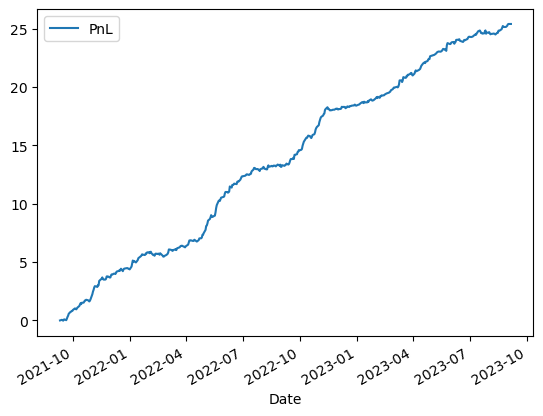

In [130]:
resultDf,pnlDf = calculate_alpha_performance(files_array,string)

![pnl_table_formulation.png](attachment:pnl_table_formulation.png)

In [120]:
pnlDf

,Date,PnL
0,2021-09-10,-0.001134
1,2021-09-13,0.052114
2,2021-09-14,0.022667
3,2021-09-15,-0.023784
4,2021-09-16,0.065494
...,...,...
494,2023-08-29,25.202594
495,2023-08-30,25.256671
496,2023-08-31,25.372666
497,2023-09-01,25.411918


In [209]:
def objective(files_array,candidate_string):
    # Evaluate profit for alpha candidate for 1 year period
    resultDf,pnlDf = calculate_alpha_performance(files_array,candidate_string)
    one_year_return = pnlDf.iloc[-6,1] - pnlDf.iloc[-365,1]  
    six_month_return = pnlDf.iloc[-6,1] - pnlDf.iloc[-180,1]
    three_month_return = pnlDf.iloc[-6,1] - pnlDf.iloc[-90,1]  
    one_month_return = pnlDf.iloc[-6,1] - pnlDf.iloc[-30,1]  
    average_return = (one_month_return + three_month_return + six_month_return + one_year_return)/4
    return average_return

Calculating performance for alpha: -(High + Low - Open + Close * ((Low + Volume)) + Close + ((Close)) + ((Volume)))


,Date,PnL
0,2021-09-10,0.026015
1,2021-09-13,-0.010106
2,2021-09-14,-0.034346
3,2021-09-15,-0.038108
4,2021-09-16,-0.031955
...,...,...
494,2023-08-29,1.650782
495,2023-08-30,1.630948
496,2023-08-31,1.621869
497,2023-09-01,1.636629


0.6993177755419269

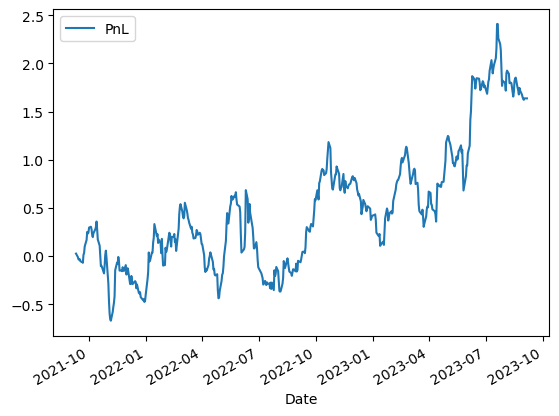

In [216]:
objective(files_array,r"-(High + Low - Open + Close * ((Low + Volume)) + Close + ((Close)) + ((Volume)))")

In [ ]:
def permutate(datafields):
    randint(0,11)

In [76]:
print()

9


In [ ]:
def selection(pop,scores,k=3):
    # first random selection
    selection_ix = randint(0,len(pop)-1)
    for ix in [randint(0,len(pop)-1) for x in range(k-1)]:
    # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

In [77]:
# Possible additions include methods to evaluate expressions and generate
# some random expressions.

class Expression:
    pass

class Number(Expression):
    def __init__(self, num):
        self.num = num

    def __str__(self):
        return str(self.num)

class BinaryExpression(Expression):
    def __init__(self, left, op, right):
        self.left = left
        self.op = op
        self.right = right

    def __str__(self):
        return str(self.left) + " " + self.op + " "  + str(self.right)

class ParenthesizedExpression(Expression):
    def __init__(self, exp):
        self.exp = exp

    def __str__(self):
        return "(" + str(self.exp) + ")"

e1 = Number(5)

In [97]:
from random import random, randint, choice

def randomAlpha(prob,datafields):
    p = random()
    if p > prob:
        return datafields[randint(0, 4)]
    elif randint(0, 1) == 0:
        return ParenthesizedExpression(randomAlpha(prob / 1.2,datafields))
    else:
        left = randomAlpha(prob / 1.2,datafields)
        op = choice(["+", "-", "*", "/"])
        right = randomAlpha(prob / 1.2,datafields)
        return BinaryExpression(left, op, right)

past_alphas = []
alphas_to_sim = []
for i in range(100):
    duplicate = True
    while duplicate:
        generated = randomAlpha(1,fields)
        if generated not in past_alphas:
            duplicate = False
            past_alphas.append(generated)
            print(generated)
print(past_alphas)

(((Volume * Close))) + (Volume) + Open * Volume * (Close) + High + (Low)
(High + Open)
Low - High * ((Close) - Volume)
((Low) + Low - ((Close)) / High + Close)
((Open))
((Volume)) + Close + Low + ((Volume)) - High + (Volume + Low) * Open
Close - (Close) / (High) / ((Low))
Low * Volume / (Open) * High / Close + High / Close / High
(((((Low)))) + Volume)
((((Open / Low + Volume * Close - Volume)) * Low / High))
(Volume) / High / ((High))
(((Open)))
(Low - (Close - Open)) * Low + Volume + Open - Close * (High) - Close - Low / Close * Volume * Low - Open / High * High - High / Close
(((Low + Low)))
Open - Low + ((Close + Volume))
((High))
Volume * (Close)
Open + Low / Volume + Open + Close + (Close) + Low
(((Volume) * Low) + (Close * Close * Close) / (High))
(Close)
(Close - Open) - ((Open * High * Close + Close))
(((((Open)))) * Close) * (Volume)
((Low / Close * Close / Open))
((Volume * Volume + Open) + (High))
(Open + (Volume) / ((High) - (Volume) * Volume))
(Volume - Open / Volume)
(Op

In [ ]:
# record cost into  (buy-sell)/2 * trading volume (alpha tree)
# if the volume keeps going up the volatility will be lower, liquidity higher (start with higher volatility stock)
# AAPL. and choose some more larger or smaller companies. 3 large, 3 small 3 medium.
# choose the most appropriate alpha signal for each stock, and continuously improve.

In [ ]:
# dont neccesarily need to buy or sell even if the signal moves. << 
# mid term: mid risk minimise risk and max profit. (sharpe ratio)
# 1. how to optimise portfolio weight
# 2. how to trade
# 3. measure risk using formulas, if risk increases then buy or sell, if risk is low, can add probability to buy or sell.
# if risk is low then quickly buy but if risk is high then buy before change.
# High risk, high profit vice versa. 

# try to get more information beyond yahoofinance, for long term indicators. and fundamental data. Annual return must be more than benchmark. Compare against index 

#reason for choice of dataset and stocks
# follow similiar writing to paper: 

# sliding window moving average 5 days moving average. 20 / 50 > 2 moving average crossover
# genetic algorithm to choose when to buy or sell.


In [2]:
import re

class Node:
    def __init__(self, value):
        self.value = value
        self.children = []

def parse_arithmetic(expression):
    tokens = re.findall(r'\w+|[()+\-*\/]', expression)

    def parse_expression(tokens):
        node = parse_term(tokens)

        while tokens and tokens[0] in ['+', '-']:
            operator = tokens.pop(0)
            right = parse_term(tokens)
            node = Node(operator)
            node.children.extend([node, right])

        return node

    def parse_term(tokens):
        node = parse_factor(tokens)

        while tokens and tokens[0] in ['*', '/']:
            operator = tokens.pop(0)
            right = parse_factor(tokens)
            node = Node(operator)
            node.children.extend([node, right])

        return node

    def parse_factor(tokens):
        token = tokens.pop(0)

        if token == '(':
            node = parse_expression(tokens)
            tokens.pop(0)  # Consume ')'
            return node
        else:
            return Node(token)

    return parse_expression(tokens)

# Example usage
arithmetic_expression = "a*b+c*(d*(g-f))"
tree_root = parse_arithmetic(arithmetic_expression)

# Helper function to visualize the tree
def print_tree(node, depth=0):
    print("  " * depth + node.value)
    for child in node.children:
        print_tree(child, depth + 1)

print_tree(tree_root)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
https://www.educative.io/answers/how-to-represent-a-mathematical-expression-using-the-parse-tree
    
# 1. implement the parse tree
# 2. randomly select a break point to break the tree and rejoin
# 3. complete the code that tests the data.

In [ ]:
class Node:
    def __init__(self, value, parent):
        self.value = value
        self.children = []
        self.parent = ""

In [10]:
import re

def add_spaces_around_brackets(expression):
    # Add a space before and after every open or close bracket
    modified_expression = re.sub(r'(?<=\w)([()])|([()])(?=\w|$)', r' \1\2 ', expression)

    return modified_expression

# Example usage
input_expression = "((Open / Volume) + Open - Open * (Volume) / Volume * ((Close - Open)))"
result = add_spaces_around_brackets(input_expression)

print(result)

( ( Open / Volume )  + Open - Open *  ( Volume )  / Volume * ( ( Close - Open ) ) ) 


In [28]:
class Node:
    def __init__(self, value):
        self.value = value
        self.children = []

def parse_expression(tokens):
    node = parse_term(tokens)

    while tokens and tokens[0] in ['+', '-']:
        operator = tokens.pop(0)
        right = parse_term(tokens)
        new_node = Node(operator)
        new_node.children.extend([node, right])
        node = new_node

    return node

def parse_term(tokens):
    node = parse_factor(tokens)

    while tokens and tokens[0] in ['*', '/']:
        operator = tokens.pop(0)
        right = parse_factor(tokens)
        new_node = Node(operator)
        new_node.children.extend([node, right])
        node = new_node

    return node

def parse_factor(tokens):
    if not tokens:
        raise ValueError("Unexpected end of expression")

    token = tokens.pop(0)

    if token.isalnum():  # Changed from isdigit() to isalnum() to handle alphabetic tokens
        return Node(token)
    elif token == '(':
        node = parse_expression(tokens)
        if tokens[0] != ')':
            raise ValueError("Expected ')'")
        tokens.pop(0)  # Consume ')'
        return node
    else:
        raise ValueError(f"Unexpected token: {token}")

def parse_math_expression(expression):
    tokens = expression.replace('(', ' ( ').replace(')', ' ) ').split()
    return parse_expression(tokens)

# Example usage
math_expression = "((Open / Volume) + Open - Open * (Volume) / Volume * ((Close - Open)))"
parse_tree_root = parse_math_expression(math_expression)

math_expression = "((Open / Volume) + Open - Open * (Volume) / Volume * ((Close - Open)))"
p1 = parse_math_expression(math_expression)

math_expression = "(Open - Open * (Volume) / Volume * ((Close - Open)))"
p2 = parse_math_expression(math_expression)

# Helper function to visualize the tree
def print_tree(node, depth=0, prefix=""):
    # Handle the root node
    if depth == 0:
        print(node.value)
    else:
        print(prefix + "└── " + node.value)

    if node.children:
        new_prefix = prefix + ("    " if depth == 0 else "│   ")
        for i, child in enumerate(node.children):
            # Update the prefix for the last child
            if i == len(node.children) - 1:
                new_prefix = prefix + "    "
            print_tree(child, depth + 1, new_prefix)

print_tree(parse_tree_root)

-
    └── +
    │   └── /
    │   │   └── Open
    │       └── Volume
        └── Open
    └── *
    │   └── /
    │   │   └── *
    │   │   │   └── Open
    │   │       └── Volume
    │       └── Volume
        └── -
        │   └── Close
            └── Open


In [31]:
from random import choice

def is_operator(node):
    """Check if a node is an operator."""
    return node.value in ['+', '-', '*', '/']

def get_nodes_of_type(node, operator=True):
    """Get all nodes of a specified type (operator or operand)."""
    stack = [node]
    nodes = []
    while stack:
        current_node = stack.pop()
        if (is_operator(current_node) == operator) and (current_node != node):  # Exclude the root node
            nodes.append(current_node)
        stack.extend(current_node.children)
    return nodes

def swap_subtrees(node1, node2):
    """Swap two subtrees."""
    node1.value, node2.value = node2.value, node1.value
    node1.children, node2.children = node2.children, node1.children


def crossover(p1, p2, r_cross):
    print_tree(p1)
    
    # Check for recombination
    if uniform(0, 1) < r_cross:
        # Select random nodes of the same type (operator) from each parent
        p1_nodes = get_nodes_of_type(p1, operator=True)
        p2_nodes = get_nodes_of_type(p2, operator=True)
        
        if p1_nodes and p2_nodes:
            node_p1 = choice(p1_nodes)
            node_p2 = choice(p2_nodes)
            
            # Swap the subtrees
            swap_subtrees(node_p1, node_p2)
            
    print_tree(p1)
            
            

# Example usage
# Assuming p1 and p2 are root nodes of two alpha trees
crossover(p1, p2, r_cross=0.9)

-
    └── +
    │   └── /
    │   │   └── Open
    │       └── Volume
        └── Open
    └── *
    │   └── /
    │   │   └── *
    │   │   │   └── Open
    │   │       └── Volume
    │       └── Volume
        └── -
        │   └── Close
            └── Open
-
    └── +
    │   └── /
    │   │   └── Open
    │       └── Volume
        └── Open
    └── *
    │   └── Open
        └── Volume


In [32]:
def tree_to_expression(node):
    # If the node is a leaf (has no children), return its value
    if not node.children:
        return node.value

    # If the node is not a leaf, it should be an operator
    # We then recursively get the expressions of its children
    left_expr = tree_to_expression(node.children[0])
    right_expr = tree_to_expression(node.children[1])

    # Construct and return the expression string
    return f"({left_expr} {node.value} {right_expr})"

# Example usage
# Assuming root is the root of your expression tree
expression = tree_to_expression(p1)
print(expression)

(((Open / Volume) + Open) - (Open * Volume))


In [18]:
import requests
api_url = "https://financialmodelingprep.com/api/v3/income-statement/PLD?period=annual&apikey=ed422f5ab8a52bef7a04a8d39de5129d"
response = requests.get(api_url)
response.json()
# Get Income Statement Data
df = pd.DataFrame(response.json())
df

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,costAndExpenses,interestIncome,interestExpense,depreciationAndAmortization,ebitda,ebitdaratio,operatingIncome,operatingIncomeRatio,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2022-12-31,PLD,USD,0001045609,2023-02-14,2023-02-14 16:54:39,2022,FY,5973692000,1509094000,4464598000,0.747377,0,331083000,0,331083000,1853113000,2184196000,3693290000,0,291903000,1812777000,4386917000,0.734373,2574140000,0.430913,1116670000,3690810000,0.617844,-135402000,3364856000,0.563279,4.2800,4.250,785675000,811608000,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
1,2021-12-31,PLD,USD,0001045609,2022-02-09,2022-02-09 17:07:38,2021,FY,4759440000,1248487000,3510953000,0.737682,0,293167000,0,293167000,1600377000,1893544000,3142031000,871000,250094000,1577942000,3584343000,0.753102,2006401000,0.421562,1316447000,3322848000,0.698159,174258000,2939723000,0.617662,3.9700,3.940,739363000,764762000,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
2,2020-12-31,PLD,USD,0001045609,2021-02-11,2021-02-10 17:36:58,2020,FY,4438735000,1170104000,3268631000,0.736388,0,274845000,0,274845000,1591979000,1866824000,3036928000,1044000,299907000,1561969000,3247590000,0.731648,1685621000,0.379753,61467000,1747088000,0.393600,130458000,1481814000,0.333837,2.0200,2.010,728322997,754413996,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
3,2019-12-31,PLD,USD,0001045609,2020-02-11,2020-02-10 19:43:14,2019,FY,3330621000,918927000,2411694000,0.724097,0,266718000,0,266718000,1153028000,1419746000,2338673000,24213000,226660000,1139879000,2342925000,0.703450,1203046000,0.361208,573317000,1776363000,0.533343,74517000,1572959000,0.472272,2.4800,2.460,630579997,654902997,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
4,2018-12-31,PLD,USD,0001045609,2019-02-13,2019-02-13 17:31:20,2018,FY,2804449000,757688000,2046761000,0.729826,0,238985000,0,238985000,960774000,1199759000,1957447000,14663000,215898000,947214000,2875803000,1.025443,847002000,0.302021,1253766000,1886290000,0.672606,63330000,1649361000,0.588123,2.9100,2.790,567367000,590239000,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
5,2017-12-31,PLD,USD,0001045609,2018-02-15,2018-02-15 16:57:10,2017,FY,2618134000,724664000,1893470000,0.723214,0,231059000,0,231059000,891345000,1122404000,1847068000,13731000,260007000,879140000,2846081000,1.087065,771066000,0.294510,1305257000,1815568000,0.693459,54609000,1652325000,0.631108,3.1000,3.060,530400000,552300000,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
6,2016-12-31,PLD,USD,0001045609,2017-02-15,2017-02-14 18:08:50,2016,FY,2533135000,697376000,1835759000,0.724698,0,222067000,0,222067000,945314000,1167381000,1864757000,8101000,287687000,930985000,2483168000,0.980275,668378000,0.263854,973373000,1347104000,0.531793,54564000,1209932000,0.477642,2.2900,2.270,526103000,546666000,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
7,2015-12-31,PLD,USD,0001045609,2016-02-19,2016-02-19 16:15:11,2015,FY,2197074000,631632000,1565442000,0.712512,0,238199000,0,238199000,947071000,1185270000,1816902000,25484000,287951000,880373000,2060853000,0.937999,380172000,0.173036,844312000,948605000,0.431758,23090000,869439000,0.395726,1.6600,1.640,521241000,533944000,https://www.sec.gov/Archives/edgar/data/104560...,https://

In [12]:
# Get balance sheet
api_url2 = "https://financialmodelingprep.com/api/v3/balance-sheet-statement/PLD?period=annual&apikey=ed422f5ab8a52bef7a04a8d39de5129d"
response2 = requests.get(api_url2)
response2.json()
# Get Income Statement Data
df2 = pd.DataFrame(response2.json())
df2

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,goodwillAndIntangibleAssets,longTermInvestments,taxAssets,otherNonCurrentAssets,totalNonCurrentAssets,otherAssets,totalAssets,accountPayables,shortTermDebt,taxPayables,deferredRevenue,otherCurrentLiabilities,totalCurrentLiabilities,longTermDebt,deferredRevenueNonCurrent,deferredTaxLiabilitiesNonCurrent,otherNonCurrentLiabilities,totalNonCurrentLiabilities,otherLiabilities,capitalLeaseObligations,totalLiabilities,preferredStock,commonStock,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link,finalLink
0,2022-12-31,PLD,USD,0001045609,2023-02-14,2023-02-14 16:54:39,2022,FY,278483000,0,278483000,637850000,-877333000,770740000,809740000,855327000,0,1183006000,1183006000,9698898000,5732000,75344745000,87087708000,0,87897448000,1711885000,1538461000,114917000,329780000,2578268000,6158394000,23875961000,0,0,0,23875961000,0,638811000,30034355000,63948000,9231000,-457695000,-443609000,54065407000,53237282000,57863093000,87897448000,4625811000,87897448000,9698898000,25414422000,25135939000,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
1,2021-12-31,PLD,USD,0001045609,2022-02-09,2022-02-09 17:07:38,2021,FY,556117000,0,556117000,593244000,0,0,1972640000,577408000,0,552517000,552517000,8610958000,8926000,46763771000,56513580000,0,58486220000,1252767000,491393000,123093000,186368000,133724000,2064252000,17672106000,0,0,1007652000,18679758000,0,448445000,20744010000,63948000,7398000,-1327828000,-878253000,35561608000,33426873000,37742210000,58486220000,4315337000,58486220000,8610958000,18163499000,17607382000,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
2,2020-12-31,PLD,USD,0001045609,2021-02-11,2021-02-10 17:36:58,2020,FY,598086000,0,598086000,380377000,0,0,2187913000,610501000,0,726821000,726821000,7602014000,5592000,44932164000,53877092000,0,56065005000,1143372000,171794000,110169000,167973000,126383000,1609522000,17164254000,167973000,-131491000,930167000,18130903000,0,486972000,19740425000,63948000,7394000,-2394690000,-1193739000,35488634000,31971547000,36324580000,56065005000,4353033000,56065005000,7602014000,17336048000,16737962000,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
3,2019-12-31,PLD,USD,0001045609,2020-02-11,2020-02-10 19:43:14,2019,FY,1088855000,0,1088855000,242066000,0,0,2161282000,593798000,0,314179000,314179000,6237371000,4595000,30720625000,37870568000,0,40031850000,704954000,184255000,75688000,118123000,117682000,1125014000,12193256000,118123000,-94272000,617945000,12835052000,0,471634000,13960066000,68948000,6318000,-2151168000,-990398000,25719427000,22653127000,26071784000,40031850000,3418657000,40031850000,6237371000,12377511000,11288656000,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
4,2018-12-31,PLD,USD,0001045609,2019-02-13,2019-02-13 17:31:20,2018,FY,343856000,0,343856000,239526000,-348107000,730869000,966144000,112211000,0,450690000,450690000,5745294000,8767000,31134558000,37451520000,0,38417664000,760515000,50500000,70803000,96171000,619775000,1526961000,11089815000,96171000,-687484000,591313000,11089815000,0,0,12616776000,68948000,6296000,-2378467000,-1084671000,25685987000,22298093000,25800888000,38417664000,3502795000,38417664000,5745294000,11089815000,10745959000,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
5,2017-12-31,PLD,USD,0001045609,2018-02-15,2018-02-15 16:57:10,2017,FY,447046000,

In [13]:
# get cashflow
api_url3 = "https://financialmodelingprep.com/api/v3/cash-flow-statement/PLD?period=annual&apikey=ed422f5ab8a52bef7a04a8d39de5129d"
response3 = requests.get(api_url3)
response3.json()
# Get Income Statement Data
df3 = pd.DataFrame(response3.json())
df3

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,netCashProvidedByOperatingActivities,investmentsInPropertyPlantAndEquipment,acquisitionsNet,purchasesOfInvestments,salesMaturitiesOfInvestments,otherInvestingActivites,netCashUsedForInvestingActivites,debtRepayment,commonStockIssued,commonStockRepurchased,dividendsPaid,otherFinancingActivites,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
0,2022-12-31,PLD,USD,0001045609,2023-02-14,2023-02-14 16:54:39,2022,FY,3555398000,1812777000,12638000,175356000,-26224000,-135254000,0,109030000,0,-1403515000,4126430000,0,-365372000,-3458000,59281000,-4189508000,-4499057000,-1381005000,0,0,-2571267000,4068061000,115789000,-20796000,-277634000,278483000,556117000,4126430000,0,4126430000,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
1,2021-12-31,PLD,USD,0001045609,2022-02-09,2022-02-09 17:07:38,2021,FY,3148590000,1577942000,1322000,113028000,-165876000,-342734000,0,176858000,0,-1678964000,2996042000,0,-739828000,-16513000,3305000,-1237022000,-1990058000,-2560174000,743000,3921026000,-1872861000,-497059000,-1008325000,-39628000,-41969000,556117000,598086000,2996042000,0,2996042000,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
2,2020-12-31,PLD,USD,0001045609,2021-02-11,2021-02-10 17:36:58,2020,FY,1616630000,1561969000,744000,109831000,-18844000,-112949000,0,94105000,0,-333325000,2937005000,-1248294000,-1823666000,-9034000,2352000,4312000,-3074330000,-6793265000,2217000,-42029000,-1722989000,8183904000,-372162000,18718000,-490769000,598086000,1088855000,2937005000,-1248294000,1688711000,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
3,2019-12-31,PLD,USD,0001045609,2020-02-11,2020-02-10 19:43:14,2019,FY,1701846000,1139879000,12221000,97557000,18611000,-96608000,0,115219000,0,-706080000,2264034000,0,113294000,-30424000,23640000,-791860000,-685350000,-3301827000,6082000,4104522000,-1345660000,-302716000,-839599000,5914000,744999000,1088855000,343856000,2264034000,0,2264034000,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
4,2018-12-31,PLD,USD,0001045609,2019-02-13,2019-02-13 17:31:20,2018,FY,1822960000,947214000,1448000,76093000,-82720000,-112845000,0,30125000,0,-961436000,1803559000,-915698000,199920000,-11703000,29425000,34260000,-663796000,-4166088000,6891000,4225121000,-1123367000,-174658000,-1232101000,-10852000,-103190000,343856000,447046000,1803559000,-915698000,887861000,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
5,2017-12-31,PLD,USD,0001045609,2018-02-15,2018-02-15 16:57:10,2017,FY,1760959000,879140000,-5005000,76640000,42759000,6385000,0,36374000,0,-1067247000,1687246000,-110635000,-415189000,-5058000,7541000,1066619000,543278000,-3578889000,32858000,-13182000,-942884000,1895513000,-2606584000,15790000,-360270000,447046000,807316000,1687246000,-110635000,1576611000,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
6,2016-12-31,PLD,USD,0001045609,2017-02-15,2017-02-14 18:08:50,2016,FY,1292540000,930985000,-5525000,60341000,-65001000,-91514000,0,26513000,0,-796335000,1417005000,-101677000,510599000,101677000,79767000,661672000,1252038000,-2301647000,39470000,1403325000,-893455000,-373158000,-2125465000,-342000,543236000,807316000,264080000,1417005000,-101677000,1315328000,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...
7,2015-12-31,PLD,USD,0001045609,2016-02-19,2016-02-19 1

In [24]:
# get financial analysis
api_url4 = "https://financialmodelingprep.com/api/v3/key-metrics/PLD?period=annual&apikey=ed422f5ab8a52bef7a04a8d39de5129d"
response4 = requests.get(api_url4)
response4.json()
# Get FSA Data
df4 = pd.DataFrame(response4.json())
df4

,symbol,date,calendarYear,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
0,PLD,2022-12-31,2022,FY,7.603261,4.282758,5.252083,5.252083,0.354451,67.759929,72.141900,67.759929,32.718777,8.856914e+10,1.137051e+11,26.321823,14.826533,21.463867,21.463867,1.663668,1.663668,19.034306,25.919132,27.555316,27.555316,0.037991,0.046590,0.477380,0.289137,5.729750,0.131486,8.818477,1.160610,0.029031,0.764154,0.055424,0.000000,0.013459,0.000000,0.000000,0.000000,0.029355,80.805236,0.033656,0.038804,-37.822447,-5348654000,56680087000,-29224615000,0.477380,615547000.0,1.482326e+09,-438666500.0,38.973427,414.048446,-212.197878,9.365355,0.881539,-1.720093,0.063205,0.000000
1,PLD,2021-12-31,2021,FY,6.437217,3.976021,4.052194,4.052194,0.752157,45.210368,50.299640,45.210368,24.904672,1.244792e+11,1.420865e+11,42.343838,26.154160,41.547867,41.547867,3.723925,3.723925,29.853625,39.640887,47.424748,47.424748,0.023616,0.024069,0.543380,0.310560,4.912304,0.955620,8.022588,0.951550,0.015046,0.637088,0.061597,0.000000,0.009447,0.000000,0.000000,0.000000,0.023748,63.596707,0.036534,0.050743,-26.702662,-91612000,37189693000,-18771370000,0.543380,486810500.0,1.198070e+09,0.0,45.495701,366.251275,0.000000,8.022736,0.996584,0.000000,0.087945,0.000000
2,PLD,2020-12-31,2020,FY,6.094459,2.034556,4.032558,2.318629,0.821182,43.897484,48.876335,43.897484,24.214470,7.258467e+10,8.932263e+10,48.983658,16.352558,24.713839,42.982292,2.270290,2.270290,20.123443,27.504282,30.412829,52.893972,0.020415,0.023265,0.542234,0.309213,5.153964,1.359356,5.620479,1.816745,0.023738,1.162757,0.061920,0.000000,0.012964,-0.425023,-0.281227,-0.799180,0.024744,44.827643,0.031324,0.026777,-25.891063,578391000,35597759000,-17552512000,0.542234,311221500.0,9.241630e+08,0.0,31.278642,356.661271,0.000000,11.669304,1.023380,0.000000,0.046348,-1.713929
3,PLD,2019-12-31,2019,FY,5.281837,2.494464,3.590399,3.590399,1.726752,35.924271,40.847482,35.924271,19.988219,5.620990e+10,6.749856e+10,35.735134,16.876703,24.827322,24.827322,2.481331,2.481331,20.266058,28.809525,29.813403,29.813403,0.027984,0.040278,0.546393,0.309192,4.818189,1.921116,5.307712,1.330340,0.023940,0.855496,0.080081,0.000000,0.007848,0.000000,0.000000,0.000000,0.029291,44.902844,0.032465,0.039604,-20.123793,1036268000,25757605000,-11798784000,0.546393,240796000.0,7.327345e+08,-174053500.0,26.527813,280.009413,0.000000,13.759144,1.303528,0.000000,0.069437,0.000000
4,PLD,2018-12-31,2018,FY,4.942919,2.907044,3.178823,1.564880,0.606056,39.301004,44.680424,39.301004,20.015639,3.331579e+10,4.406175e+10,20.199211,11.879621,18.472249,37.523655,1.494109,1.494109,15.711375,15.321546,24.430445,49.626855,0.049507,0.026650,0.499608,0.289979,3.736681,0.632723,3.923158,0.989357,0.033719,0.681092,0.085216,0.000000,0.011731,-0.507717,-0.326516,-0.966728,0.027133,50.701278,0.024480,0.043442,-21.621506,-560817000,25350198000,-11650632000,0.499608,136893000.0,7.316595e+08,-225143000.0,31.174391,366.361847,-167.693107,11.708328,0.996283,-2.176595,0.073969,-1.613943
5,PLD,2017-12-31,2017,FY,4.936150,3.115243,3.1

In [35]:
join_cols = ['date','symbol','reportedCurrency','cik','fillingDate','acceptedDate','calendarYear','period']

combined_fs_df = df.merge(df2, on=join_cols, how='left').merge(df3, on=join_cols, how='left').merge(df4, on=['date','calendarYear','period','symbol'], how='left')

combined_fs_df

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,costAndExpenses,interestIncome,interestExpense,depreciationAndAmortization_x,ebitda,ebitdaratio,operatingIncome,operatingIncomeRatio,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome_x,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link_x,finalLink_x,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory_x,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,goodwillAndIntangibleAssets,longTermInvestments,taxAssets,otherNonCurrentAssets,totalNonCurrentAssets,otherAssets,totalAssets,accountPayables,shortTermDebt,taxPayables,deferredRevenue,otherCurrentLiabilities,totalCurrentLiabilities,longTermDebt,deferredRevenueNonCurrent,deferredTaxLiabilitiesNonCurrent,otherNonCurrentLiabilities,totalNonCurrentLiabilities,otherLiabilities,capitalLeaseObligations,totalLiabilities,preferredStock,commonStock,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link_y,finalLink_y,netIncome_y,depreciationAndAmortization_y,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory_y,accountsPayables,otherWorkingCapital,otherNonCashItems,netCashProvidedByOperatingActivities,investmentsInPropertyPlantAndEquipment,acquisitionsNet,purchasesOfInvestments,salesMaturitiesOfInvestments,otherInvestingActivites,netCashUsedForInvestingActivites,debtRepayment,commonStockIssued,commonStockRepurchased,dividendsPaid,otherFinancingActivites,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
0,2022-12-31,PLD,USD,0001045609,2023-02-14,2023-02-14 16:54:39,2022,FY,5973692000,1509094000,4464598000,0.747377,0,331083000,0,331083000,1853113000,2184196000,3693290000,0,291903000,1812777000,4386917000,0.734373,2574140000,0.430913,1116670000,3690810000,0.617844,-135402000,3364856000,0.563279,4.2800,4.250,785675000,811608000,https://www.sec.gov/Archives/edgar/data/104560...,https://www.sec.gov/Archives/edgar/data/104560...,278483000,0,278483000,637850000,-877333000,770740000,809740000,855327000,0,1183006000,1183006000,9698898000,5732000,75344745000,87087708000,0,87897448000,1711885000,1538461000,114917000,329780000,2578268000,6158394000,23875961000,0,0,0,23875961000,0,638811000,30034355000,63948000,9231000,-457695000,-443609000,54065407000,53237282000,57863093000,87897448000,4625811000,87897448000,

In [58]:
#historical stock price
api_url5 = "https://financialmodelingprep.com/api/v3/historical-price-full/PLD?apikey=ed422f5ab8a52bef7a04a8d39de5129d"

df5 = get_fmp_dataframe(api_url5,"historical")
df5


,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2023-12-18,134.58,135.01,132.39,132.68,132.68,3803591,3802975,-1.90,-1.41000,133.14,"December 18, 23",-0.014100
1,2023-12-15,136.24,136.76,133.39,134.26,134.26,8413770,8413600,-1.98,-1.45000,134.76,"December 15, 23",-0.014500
2,2023-12-14,132.46,137.52,131.60,137.12,136.25,9543803,9543800,4.66,3.52000,135.66,"December 14, 23",0.035200
3,2023-12-13,122.36,129.43,122.13,129.24,128.42,5883223,5883200,6.88,5.62000,126.86,"December 13, 23",0.056200
4,2023-12-12,121.63,123.05,121.32,122.07,121.30,4197938,4197900,0.44,0.36175,122.19,"December 12, 23",0.003618
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2018-12-27,57.48,58.00,55.92,58.00,51.49,3251700,3251700,0.52,0.90466,57.31,"December 27, 18",0.009047
1253,2018-12-26,56.33,57.97,55.21,57.97,51.47,2593300,2593300,1.64,2.91000,57.05,"December 26, 18",0.029100
1254,2018-12-24,58.67,58.83,55.94,55.94,49.66,2049500,2049500,-2.73,-4.65000,56.90,"December 24, 18",-0.046500
1255,2018-12-21,60.01,61.03,58.79,58.87,52.27,7768300,7768300,-1.14,-1.90000,59.56,"December 21, 18",-0.019000


In [56]:
def get_fmp_dataframe(url,attribute=None):
    response = requests.get(url)
    if attribute:
        return pd.DataFrame(response.json()[attribute])
    else:
        return pd.DataFrame(response.json())


In [57]:
# market indicators
api_url6 = "https://financialmodelingprep.com/api/v3/historical-sectors-performance/?limit=1000&apikey=ed422f5ab8a52bef7a04a8d39de5129d"
df6 = get_fmp_dataframe(api_url6)
df6

,date,utilitiesChangesPercentage,basicMaterialsChangesPercentage,communicationServicesChangesPercentage,conglomeratesChangesPercentage,consumerCyclicalChangesPercentage,consumerDefensiveChangesPercentage,energyChangesPercentage,financialChangesPercentage,financialServicesChangesPercentage,healthcareChangesPercentage,industrialsChangesPercentage,realEstateChangesPercentage,servicesChangesPercentage,technologyChangesPercentage
0,2023-12-19,-0.59620,-0.37274,1.35865,None,0.32102,0.55420,-0.48141,None,-0.17560,-0.18528,-0.21827,-0.64981,None,0.39673
1,2023-12-18,-0.59620,-0.37274,1.35761,None,0.32102,0.55415,-0.48141,None,-0.17560,-0.18470,-0.21830,-0.64935,None,0.39673
2,2023-12-15,-0.97098,0.14218,0.23315,None,0.15754,-0.08809,-0.30738,None,-0.13539,-0.45457,0.12813,-0.59170,None,0.46400
3,2023-12-14,-1.17977,0.88670,-0.28715,None,0.52171,-1.16184,1.17567,None,0.44061,-0.49759,0.79966,0.82073,None,-0.11148
4,2023-12-13,3.39757,2.83752,0.43930,None,1.45900,1.78891,1.30561,None,1.49441,2.19435,1.29360,2.89140,None,0.96388
5,2023-12-12,-0.69716,-0.66412,0.45705,None,0.33124,0.05994,-0.33254,None,0.33397,0.32072,0.29597,0.05343,None,1.03808
6,2023-12-11,0.74127,0.67991,0.07791,None,0.50650,0.42759,-0.07673,None,0.11409,-0.50853,0.37415,0.49650,None,0.86739
7,2023-12-08,-0.46155,0.54292,0.76486,None,0.83959,-0.40934,0.62265,None,0.34639,0.31359,0.29597,0.14823,None,1.24549
8,2023-12-07,0.30917,0.17601,1.10193,None,0.33587,0.05300,-0.79631,None,0.24958,-0.35892,-0.11533,0.07099,None,0.20132
9,2023-12-06,0.40867,-0.90371,-0.86120,None,-0.77617,-0.23489,-1.82532,None,-0.54661,-0.29842,0.84963,-0.80524,None,-1.32776


In [61]:
# index 
api_url7 = "https://financialmodelingprep.com/api/v3/historical-price-full/index/^DJI?apikey=ed422f5ab8a52bef7a04a8d39de5129d"

df7 = get_fmp_dataframe(api_url7,"historical")
df7

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2023-12-18,37330.140630,37393.449220,37284.851560,37306.019530,37306.019530,292142011,292142011,-24.12110,-0.064616,37328.11,"December 18, 23",-0.000646
1,2023-12-15,37194.500000,37347.601560,37092.019530,37305.160160,37305.160160,788160000,788160000,110.66016,0.297520,37234.82,"December 15, 23",0.002975
2,2023-12-14,37115.628910,37287.500000,37051.519530,37248.351560,37248.351560,455820000,455820000,132.72265,0.357590,37175.75,"December 14, 23",0.003576
3,2023-12-13,36601.800780,37094.851560,36523.589840,37090.238280,37090.238280,354790000,354790000,488.43750,1.330000,36827.62,"December 13, 23",0.013300
4,2023-12-12,36442.101560,36596.109380,36373.218750,36577.941410,36577.941410,292770000,292770000,135.83985,0.372760,36497.34,"December 12, 23",0.003728
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2018-12-27,22629.060547,23138.890625,22267.419922,23138.820313,23138.820313,407940000,407940000,509.75977,2.250000,22848.38,"December 27, 18",0.022500
1253,2018-12-26,21857.730469,22878.919922,21712.529297,22878.449219,22878.449219,433080000,433080000,1020.71875,4.670000,22489.97,"December 26, 18",0.046700
1254,2018-12-24,22317.279297,22339.869141,21792.199219,21792.199219,21792.199219,308420000,308420000,-525.08008,-2.350000,21974.76,"December 24, 18",-0.023500
1255,2018-12-21,22871.740234,23254.589844,22396.339844,22445.369141,22445.369141,900510000,900510000,-426.37109,-1.860000,22698.77,"December 21, 18",-0.018600


In [ ]:


index = 


In [ ]:
"https://financialmodelingprep.com/api/v3/quotes/index?apikey=ed422f5ab8a52bef7a04a8d39de5129d"